# Aula 00 - Apresentação

## Objetivo

* Mostrar algums conceitos básicos de Python
* Entender como configurar um ambiente

## Resultado Esperado

* Gráfico simples de frequencia de palavras em dom-casmurro.

Código Python não é tão diferente de outras linguagens. Geralmente vamos precisar de algumas bibliotecas. Para isto, fazemos um import.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import re

A linha abaixo serve para que figuras sejam renderizadas no browser. Nem sempre é necessário.

In [4]:
plt.ion()

Aritmética básica

In [5]:
1 + 1

2

In [6]:
x = 2

In [7]:
y = x + 8

In [8]:
y

10

Abrimos arquivos com "with open". O with não é necessário, mas ao utilizar o mesmo criamos um contexto onde o arquivo é aberto dentro do mesmo. Após sair do bloco with, o arquivo já é fechado. A função print serve para imprimir dados. Note como no notebook tudo ocorre no browser.

In [11]:
with open('dom-casmurro.txt') as dom_casmurro:
    print(dom_casmurro.readline())

The Project Gutenberg EBook of Dom Casmurro, by Machado de Assis



Uma das vantagens de Python em relação a linguagem C é que já temos uma série de estruturas de dados disponíveis. Em particular, o código abaixo faz uso de uma lista chamada livro_inteiro.

Para entender como fazer uso da lista, você pode fazer help(list)

In [13]:
l = list()

In [8]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __l

Além do mais agora estamos fazendo uso de um laço for. Note que não temos chaves nem ; em nenhum momento. Blocos de código em Python são definidos pela identação.

In [14]:
livro_inteiro = []
with open('dom-casmurro.txt') as dom_casmurro:
    for line in dom_casmurro:
        livro_inteiro.append(line.strip())

In [20]:
livro_inteiro[103] # acessando o segundo elemento da lista

'Agora que expliquei o titulo, passo a escrever o livro. Antes disso,'

Python é bastante útil para fazer uso de expressões regulares. Minha primeira tentativa foi identificar os nomes através de expressões regulares. Deu errado :). Motivos:

- Acentos
- Pontuação

In [11]:
for linha in livro_inteiro:
    for nome in re.findall(r"^[A-Z][a-z]+?\s+", linha):
        print(nome)

The 
This 
Release 
Produced 
Literature 
Do 
Uma 
Engenho 
Tudo 
Do 
Agora 
Vivo 
Se 
Quiz 
Fiquei 
Tive 
Ia 
Minha 
Tio 
Creio 
Minha 
Um 
Nem 
Era 
Voltou 
Tinha 
Teve 
Tio 
Tio 
Tinha 
Era 
Uma 
Tambem 
Minha 
Albuquerque 
Santiago 
Tenho 
Concluo 
Aqui 
Mas 
Verdadeiramente 
Agora 
Deus 
Com 
Satanaz 
Foi 
As 
Os 
Juram 
Shakespeare 
Acceito 
Que 
Os 
Prazos 
Minha 
Quando 
Ultimamente 
Na 
Parei 
Tijolos 
Um 
Era 
Com 
Tudo 
De 
Em 
Caminhei 
Quiz 
Os 
As 
Pensei 
Nisto 
Tudo 
Conhecia 
Faltava 
Outra 
Outra 
Era 
Olhei 
Que 
Padua 
Fortunata 
Seja 
Padua 
Nos 
Com 
Ou 
Ou 
Tal 
Os 
Um 
Pae 
Fiquei 
Disse 
Em 
Dito 
Como 
Justina 
Estremeci 
Sem 
Quando 
Afinal 
Mil 
Levantei 
Mas 
Afinal 
Era 
Cogitei 
Era 
Prima 
Na 
Enruguei 
Justina 
Note 
Ciumes 
Creio 
Prazo 
Creio 
Ao 
De 
No 
Tinhamos 
Durante 
Todo 
Os 
Timidez 
As 
Pela 
Ha 
Levantou 
Ao 
Ao 
Na 
Em 
Quanto 
Vi 
Uma 
Tudo 
Assim 
Pela 
Opas 
Fiquei 
As 
Era 
Era 
Um 
Sabia 
Queria 
Olhos 
Tudo 
Fui 
Rhetorica 
Continuei

Então decidi forçar a barra e olhar para os principais personagens. Aqui começo a fazer uso da biblioteca numpy. A mesma tem uma função np.char.count que conta a quantidade de vezes que uma sub-string ocorre em um texto. Então, estamos contando para cada linha do texto a quantidade de menções para cada personagem.

Além do mais, também estou usando o dicionário (mapa de ED) para guardar as contagens.

In [25]:
mapa = {}
mapa[1] = 2
mapa[2] = 'Flavio'

In [26]:
mapa

{1: 2, 2: 'Flavio'}

In [27]:
nomes = ['Bentinho', 'Capitú', 'Escobar']
contagens = {}
for nome in nomes:
    contagens[nome] = 0
    
for linha in livro_inteiro:
    for nome in nomes:
        contagens[nome] += np.char.count(linha, nome)

In [28]:
contagens

{'Bentinho': 57, 'Capitú': 346, 'Escobar': 112}

In [29]:
y_values = np.zeros(len(nomes))
for i, nome in enumerate(nomes):
    y_values[i] = contagens[nome]

([<matplotlib.axis.XTick at 0x1062064e0>,
 <a list of 3 Text xticklabel objects>)

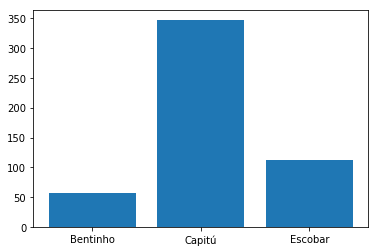

In [30]:
plt.bar([1, 2, 3], y_values)
plt.xticks([1, 2, 3], nomes)

In [31]:
mencoes_por_linha = {}
for nome in nomes:
    mencoes_por_linha[nome] = np.zeros(len(livro_inteiro))
    
for i, linha in enumerate(livro_inteiro):
    for nome in nomes:
        mencoes_por_linha[nome][i] += np.char.count(linha, nome)

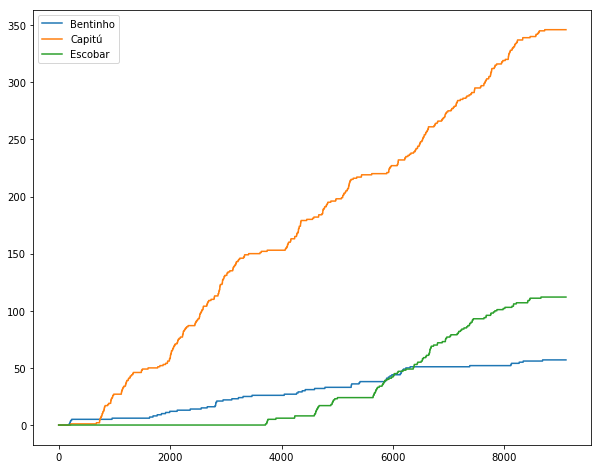

In [32]:
plt.figure(figsize=(10, 8))
for nome in nomes:
    plt.plot(np.cumsum(mencoes_por_linha[nome]), label=nome)
plt.legend()